# Pre-processing + pipeline

# Tranformer sklearn

# Encodage

In [14]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

In [8]:
y=np.array(["chat","chien","chat","oiseau"])

In [11]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [13]:
encoder.inverse_transform(np.array([0,0,2,2]))

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

In [16]:
X=np.array([["chat","poils"],
           ["chien","pois"],
           ["chat","poils"],
           ["oiseau","plumes"]])

In [17]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 2.],
       [0., 1.],
       [2., 0.]])

In [18]:
from sklearn.preprocessing import LabelBinarizer

In [19]:
y=np.array(["chat","chien","chat","oiseau"])

In [20]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

# Normalisation

# Normalisation MinMax

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris



In [29]:
iris = load_iris()
X = iris.data

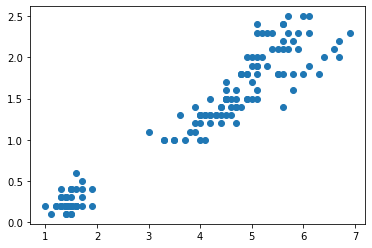

In [33]:
plt.scatter(X[:, 2], X[:, 3])


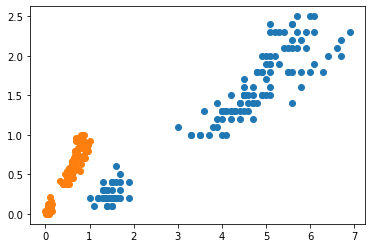

In [27]:
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_minmax[:, 2], X_minmax[:, 3])

# Standardisation

In [34]:
from sklearn.preprocessing import  StandardScaler

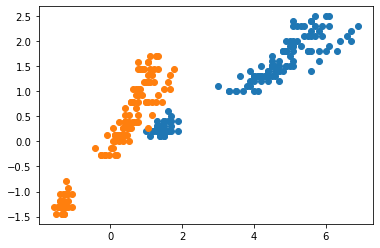

In [35]:
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3])

# RobustScaler

In [36]:
from sklearn.preprocessing import RobustScaler

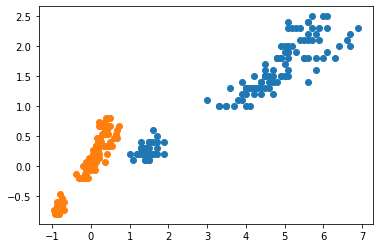

In [37]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3])

# Polynomial Features

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

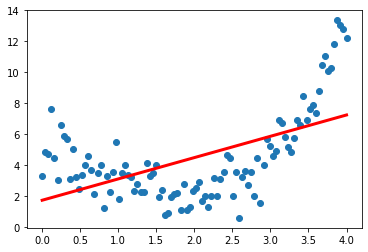

In [39]:
m = 100
X = np.linspace(0, 4, m).reshape((m, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(m, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

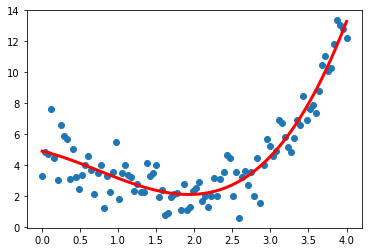

In [40]:
X_poly = PolynomialFeatures(3).fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

# Pipeline


In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [42]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [46]:
grid.score(X_test, y_test)

0.9736842105263158